<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Geometric_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Geometric Operations in Python**

`geopandas` makes available all the tools for geometric manipulations in the `shapely` library.

Here is a list of supported geometric operations in `geopandas`, most of them can be used on a `GeoDataFrame` or a `GeoSeries`.

 

*   GeoSeries.buffer(distance): Create a buffer to the shape (point, line, polygon)
*   GeoSeries.centroid: Calculate the geometric centroid of a shape
*   GeoSeries.area: Calculate the area of a shape
*   GeoSeries.length: Calculate the length a shape

In [1]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 1.0 MB 5.8 MB/s 
     |████████████████████████████████| 6.3 MB 38.1 MB/s 
     |████████████████████████████████| 16.7 MB 26.9 MB/s 




Let's play around with those methods using the US states example. Load the data from shapefile and then plot.

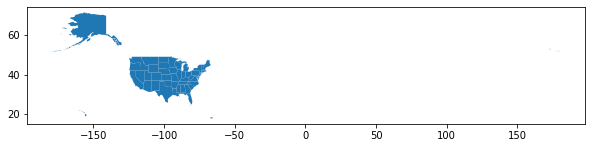

In [7]:
states = gpd.read_file("./sample_data/cb_2018_us_state_20m.shp")
states.plot(figsize = (10,10))

Remove Alaska so the map looks neat.

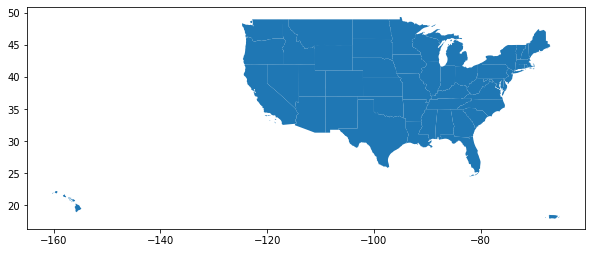

In [8]:
states = states[states.NAME != 'Alaska']
states.plot(figsize = (10,10))

First, lets calculate the centroid of each state

In [9]:
states.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      POINT (-76.75104 39.02806)
1      POINT (-93.49896 42.07492)
2      POINT (-75.50095 39.00063)
3      POINT (-82.79138 40.29542)
4      POINT (-77.79954 40.87416)
5      POINT (-99.81026 41.52719)
6     POINT (-120.49248 47.38968)
7      POINT (-66.45678 18.22104)
8      POINT (-86.82839 32.78888)
9      POINT (-92.43785 34.90002)
10    POINT (-106.10836 34.42141)
11     POINT (-99.33232 31.46200)
12    POINT (-119.61112 37.24221)
13     POINT (-85.28902 37.52595)
14     POINT (-83.44336 32.64809)
15     POINT (-90.00945 44.63903)
16    POINT (-120.55674 43.93693)
17     POINT (-92.47789 38.36847)
18     POINT (-78.78781 37.51260)
19     POINT (-86.34064 35.84332)
20     POINT (-91.94549 31.02018)
21     POINT (-75.49798 42.93723)
22     POINT (-85.43884 44.37229)
23    POINT (-114.65872 44.39033)
24     POINT (-82.49581 28.59530)
26     POINT (-89.19752 40.06348)
27    POINT (-109.64303 47.03433)
28     POINT (-94.30634 46.31793)
29     POINT (-86.27501 39.90782)
30     POINT (

Let us try to plot these on a map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


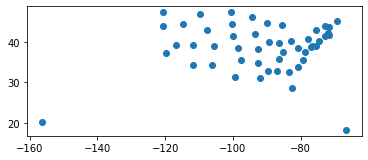

In [10]:
states.centroid.plot()

You can try and overlay the centroid points with the state polygons using the plot function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


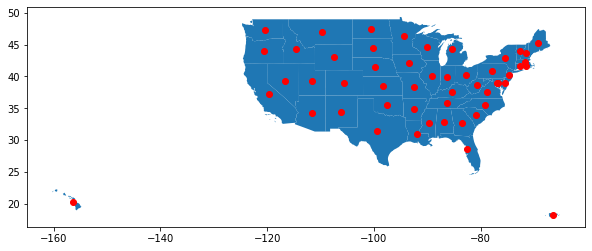

In [11]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
states.plot(ax=ax)
states.centroid.plot(ax=ax,color="red")

Then, let's create a buffer to each of the centroid. Before we do that, one important step is to check the projection. If you remember, this one is not projected.

In [12]:
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Let us reproject this shapefile to a Mercator projection so there is no stretched polygon.

In [13]:
states_projected = states.to_crs(epsg='3857')

Project it to mercator, so the the buffering distance will be in the unit of meters rather than arc-degree.

In [14]:
 #This is a 200 kilometer buffer
buffers = states_projected.centroid.buffer(distance=200000)

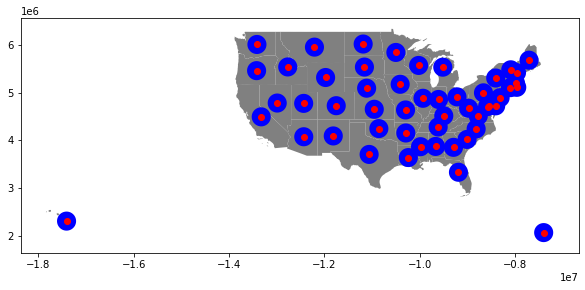

In [15]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
states_projected.plot(ax=ax, color = "grey")
buffers.plot(ax=ax,color="blue")
states_projected.centroid.plot(ax=ax,color="red")

Then let's calcuate the area and length of each state, and create two new columns in the states GeoDataFrame.

In [16]:
states_projected['state_area'] = states_projected.area
states_projected['state_length'] = states_projected.length

Let's find out which state has the largest area? Have a guess before running the command?

In [17]:
states_projected.sort_values('state_area', ascending=False)[['NAME','state_area']]

,NAME,state_area
11,Texas,9.568585e+11
27,Montana,8.197266e+11
12,California,6.510183e+11
16,Oregon,4.852647e+11
32,Nevada,4.802489e+11
45,Wyoming,4.742448e+11
10,New Mexico,4.643914e+11
28,Minnesota,4.592579e+11
42,Colorado,4.472585e+11
50,Arizona,4.341031e+11


Let's find out which state has the largest length (circumference)? Have another guess?

In [18]:
states_projected.sort_values('state_length', ascending=False)[['NAME','state_length']]

,NAME,state_length
11,Texas,5.439915e+06
22,Michigan,5.402235e+06
12,California,5.047230e+06
27,Montana,4.204599e+06
28,Minnesota,3.768337e+06
23,Idaho,3.716902e+06
24,Florida,3.643665e+06
21,New York,3.253037e+06
6,Washington,3.151693e+06
16,Oregon,3.124517e+06


Now lets try to find the smallest state by area

In [19]:
states_projected.sort_values('state_area', ascending=True)[['NAME','state_area']]

,NAME,state_area
36,District of Columbia,2.958815e+08
51,Rhode Island,5.745081e+09
2,Delaware,8.829794e+09
7,Puerto Rico,1.038576e+10
48,Hawaii,1.914851e+10
34,Connecticut,2.321159e+10
35,New Jersey,3.462929e+10
30,Massachusetts,4.004727e+10
0,Maryland,4.570786e+10
49,New Hampshire,4.599467e+10
